> The purpose of this lab is for you to see some of the claimed relationships between distributions that we did not actually prove in this course.

# Generate a random sample of size 100,000 form the standard normal distribution.

> Since "sample" is a reserved word in R, we will call our sample "mysample". You can use the word "sample" but you should try to stay away from using names that are already used in R or you might see unexpected behavior. (You will learn those special words as you go!)

> In the cell below, type
`mysample<-rnorm(100000)`

> I would really recommend typing as opposed to cutting and pasting. It will help you learn the commands better!

> You can also designate any mean and variance that you want. For example `rnorm(100000,1,4)` will produce a random sample of size 100,000 from the N(1,4) distribution. If you don't specify a mean and variance, they will default to 0 and 1, respectively.

In [1]:
mysample = rnorm(10000)

# Make a histogram

> In the following cell, type `hist(mysample)`

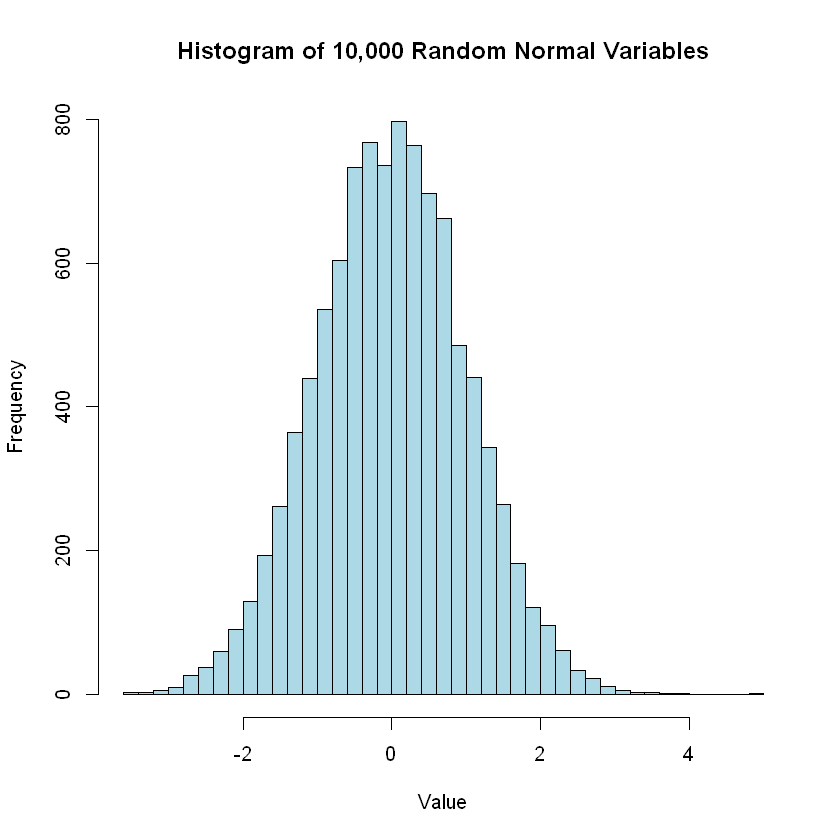

In [2]:
hist(mysample, breaks=50, main="Histogram of 10,000 Random Normal Variables", xlab="Value", col="lightblue", border="black")

> Great! Now, let's take a little more control in the appearance of the histogram. For example, the default bin width you are seeing is probably 0.5. Lets change it to 0.1. In order to do this, we will have to define the breakpoints as a sequence of numbers.

> In the next cell, type 

`min(mysample)`  
`max(mysample)`

In [3]:
min(mysample)
max(mysample)

[1] -3.534023

[1] 4.868386

> Suppose that your minimum and maximum are -4.02202956861484 and 3.40693822378908. In what follows, use your actual numbers.

> Make a sequence (vector) of bin breaks, each which length 0.1,that will include your minimum and maximum. We will call it "br". In the next cell, type `br<-seq(-4.1,3.5,0.1)`

> Notice how, in this example, we have used the closest numbers to one decimal place that will fully cover the entire dataset.

> We will now remake the histogram. In real life you would go back up to the cell where you made the previous histogram, edit your code and run it there. In order to keep these instructions flowing in a linear way, we will make an entirely new histogram below.

> Add this to the cell under your line defining the sequence of breaks.  `hist(mysample,prob=T,breaks=br')`

> The "prob=T" part will put density on the y-axis as opposed to counts. This will make the scale correct so that we can put the normal pdf on top of the histogram in the next step.

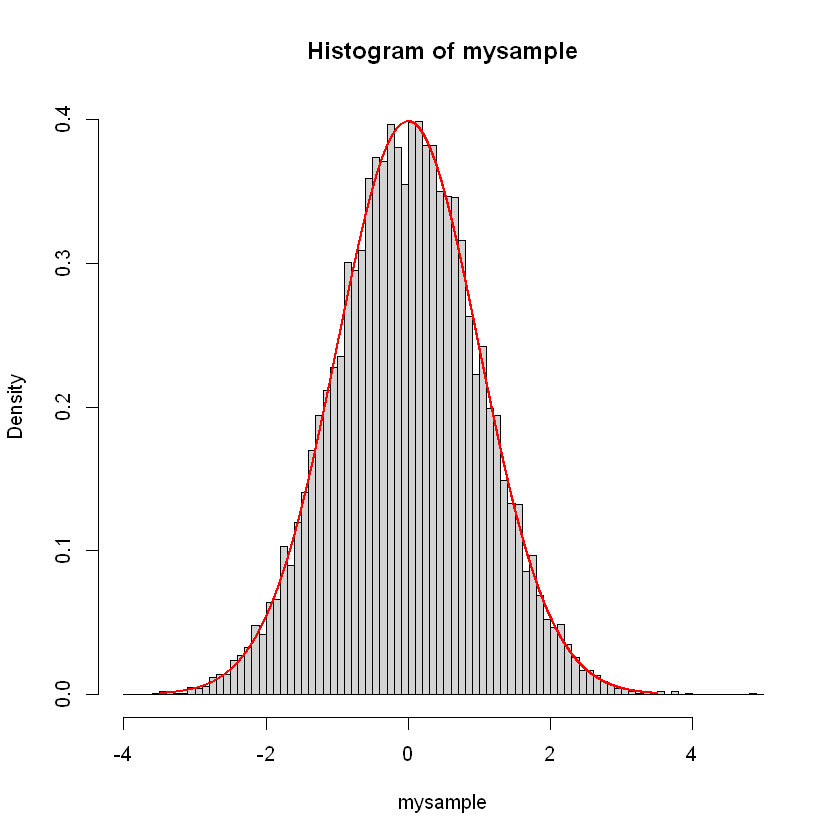

In [15]:
br = seq(-4.0, 5.0, 0.1)
hist(mysample, prob=T, breaks=br)

# Add the normal PDF overlay
x = seq(-3.5, 3.5, 0.001)
fx = (1/sqrt(2*pi)) * exp(-0.5*x^2)
lines(x, fx, col="red", lwd=2)

> Let's superimpose the N(0,1) density on our histogram. The easiest way to do this is not to make a function but rather a sequence of points where we connect the dots.

> Create a sequence of x-values. We'll make them really close together so that out "dot connecting" looks smooth.

> In the next cell, type. `x<-seq(-3.5,3.5,0.001)`

> Now let's get the pdf values. Add this to the cell. `fx<-(1/sqrt(2*pi))*exp(-0.5*x^2)`

> Go back to the previous cell where you made your last histogram and add the line `lines(x,fx)`.


In [14]:
x = seq(-3.5, 3.5, 0.001)
fx = (1/sqrt(2*pi)) * exp(-0.5*x^2)

> In this course, we have made the claim that squaring N(0,1) variables will give variables from the $\chi^{2}(1)$ distribution.

> You can square everything, elementwise, in your sample vector, like this. `newvalues<-mysample^2`.

> (You don't have to use the name "newvalues"!)

> Your mission now is to make a nice looking histogram of these values and superimpose the $\chi^{2}(1)$ pdf on top. 

- To evaluate the gamma function at, for example, 3 you would type `gamma(3)`. 
- Your new vector of values is likely to have some fairly extreme values which will make the histogram very streched in a way that you can not really see any shape. While your "breaks vector" needs to cover the entire range of values, you can can change the range of x-values that are seen in the histogram by including `xlim=c(0,4)` in your histogram statement. (The "c" is used in R to define a vector.)

> The next cell is yours. Have fun!


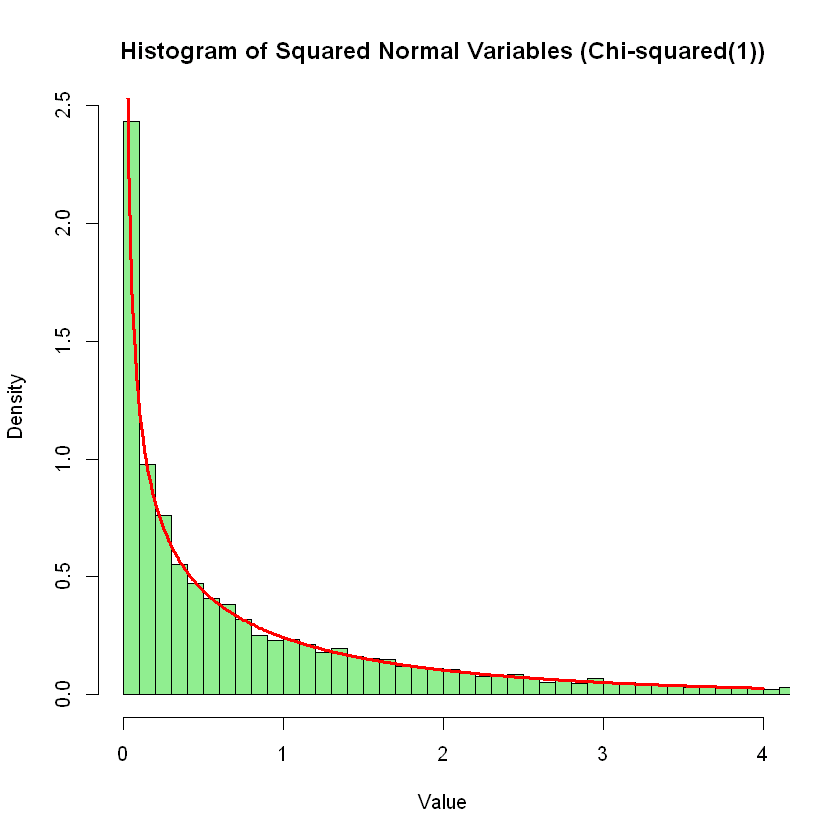

In [19]:
new_vals = mysample^2

min_val = min(new_vals)
max_val = max(new_vals)
br_chi = seq(0, max_val + 0.5, 0.1)

hist(new_vals, prob=T, breaks=br_chi, xlim=c(0,4),
     main="Histogram of Squared Normal Variables (Chi-squared(1))",
     xlab="Value", col="lightgreen", border="black")

# Create x values for the chi-squared(1) PDF
x_chi <- seq(0, 4, 0.01)

# Chi-squared(1) PDF: f(x) = (1/sqrt(2*pi*x)) * exp(-x/2) for x > 0
# Using the gamma function: f(x) = (1/gamma(1/2)) * (x^(1/2-1)) * exp(-x/2)
# Since gamma(1/2) = sqrt(pi), this simplifies to our formula above
fx_chi <- (1/sqrt(2*pi*x_chi)) * exp(-x_chi/2)

# Add the chi-squared(1) PDF line
lines(x_chi, fx_chi, col="red", lwd=3)

> As a final task, generate a random sample from the $t(1)$ distribution using normal and chi-squared samples. R has built-in functions for this just like "rnorm" for the normal distribution, but the point is to verify that $T:= \frac{Z}{\sqrt{W/n}}$ for ourselves!

Superimpose the $t(1)$ pdf. Note that the $t(n)$ pdf is

${\Large{f(x) = \frac{\Gamma \left( \frac{n+1}{2} \right)}{\sqrt{n \pi} \, \Gamma \left( \frac{n}{2} \right)} \, \left( 1 + \frac{x^{2}}{n}\right)^{-(n+1)/2}}}$

> Note: The $t(1)$ distribution is quite wide. It may be challenging to make this one look good. I recommend using the default breaks of the histogram function (i.e.: leave "breaks=br" out) for the first try and then to play with changing them if you wish.
